In [1]:
from tools.minimizers import newton, trust_region, trust_region2, bfgs, bfgs_trust, newton_multi
from pLaplace_1D.energy import JaxEnergy, JaxEnergySparse, NumpyEnergySFD, JaxEnergySFD, NumpyEnergyLaplace, JaxEnergySparseLaplace, NumbaEnergySFD, NumbaEnergyLaplace

In [23]:
p, a, b = 13, -1, 1
ne = 1000

In [24]:
jax_energy = JaxEnergySparseLaplace(p, a, b, ne)
f, df, ddf_cls_jax_sparse, ddf_laplace = jax_energy.recompile()
x0 = jax_energy.x0


In [4]:
numba_energy_laplace = NumbaEnergyLaplace(p, a, b, ne)
fn, dfn, ddf_clsn = numba_energy_laplace.recompile()



In [5]:
from scipy.optimize._minimize import minimize
import numpy as np
result = minimize(f, x0, method='TNC', jac=df)
result


 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: -16.865470379461403
       x: [-6.321e-03 -1.264e-02 ... -1.264e-02 -6.322e-03]
     nit: 491
     jac: [-2.642e-05  1.689e-05 ...  7.850e-05  1.775e-05]
    nfev: 8318

8.881784197001252e-15


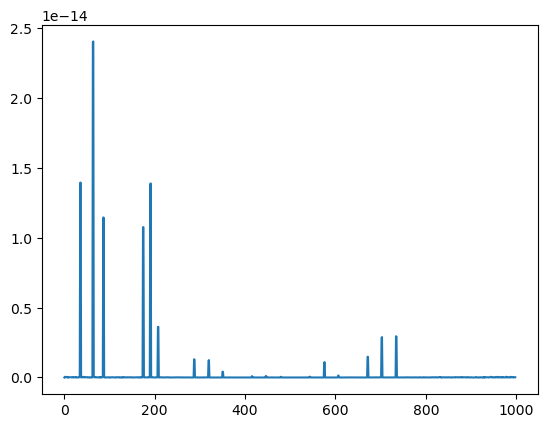

In [6]:
import matplotlib.pyplot as plt

x1 = np.linspace(a, b, ne+1)**2 - 1
x1 = x1[1:-1]
# random vector of size x0
x_rand = x1 + np.random.rand(x0.shape[0])*0.001
plt.plot(np.abs(dfn(x_rand) - df(x_rand))/np.linalg.norm(dfn(x_rand)))
print((f(x_rand) - fn(x_rand)))
plt.show()

In [33]:
from tools.minimizers import newton2
res = newton2(f, df, ddf_cls_jax_sparse, x1, tolf=1e-6, tolg=1e-3, maxit=10000, verbose=True)
res


it=1, f=238219475372100552633937498331777301715540282017166703607202601040459212801471936835547331437210549607898937987856985668016504615490453777070237600828104830888312166949234964009679995015325301398305653637325127697400523128832.00000, fstep = -2.38219e+224, ||g||=156437485570.26187, nitf=10, a=4.06531e-02
it=2, f=23693020522843565660858567627158742439870932899305998601932832908063190889529916455509656118443887410725422179141270463781462275534696778015921486671210785036745986956795364821355071018440522343259418000205207830528.00000, fstep = 2.38219e+224, ||g||=inf, nitf=10, a=9.95935e+00
it=3, f=128435218172843592956153497598127055408784451560078868312095633369209346645485708575191620584126660097501146590465764946094264533679806869664224075425643342397683905249473215659015717600856979372732819625339781120.00000, fstep = 2.35646e+214, ||g||=inf, nitf=10, a=4.25498e+00
it=4, f=inf, fstep = -inf, ||g||=inf, nitf=10, a=9.95935e+00
MatrixRankWarning
it=5, f=nan, fstep = nan, ||g||=nan,

KeyboardInterrupt: 

In [41]:
res = newton_multi(f, df, ddf_cls_jax_sparse, ddf_laplace, x0, tolf=1e-6, tolg=1e-3, maxit=10000, verbose=True)
res


MatrixRankWarning
it=1, f=-7.00991, fstep = 7.00991e+00, ||g||=0.63214, nitf=45, a=-1.59584e-02, b=1.05570e-01
it=2, f=-7.16756, fstep = 1.57653e-01, ||g||=2.34160, nitf=59, a=0.00000e+00, b=5.57281e-02
it=3, f=-9.26738, fstep = 2.09982e+00, ||g||=83.25381, nitf=243, a=0.00000e+00, b=3.34288e-03
it=4, f=-9.32213, fstep = 5.47456e-02, ||g||=10.68171, nitf=55, a=0.00000e+00, b=4.48277e-02
it=5, f=-9.75808, fstep = 4.35949e-01, ||g||=75.78627, nitf=110, a=0.00000e+00, b=9.05566e-03
it=6, f=-10.13894, fstep = 3.80868e-01, ||g||=14.01851, nitf=119, a=0.00000e+00, b=2.53655e-02
it=7, f=-10.23150, fstep = 9.25601e-02, ||g||=6.76175, nitf=109, a=0.00000e+00, b=1.99343e-02
it=8, f=-10.32356, fstep = 9.20597e-02, ||g||=5.62349, nitf=112, a=0.00000e+00, b=2.23283e-02
it=9, f=-10.37144, fstep = 4.78749e-02, ||g||=5.75632, nitf=52, a=0.00000e+00, b=3.65693e-02
it=10, f=-10.45827, fstep = 8.68338e-02, ||g||=16.80823, nitf=108, a=0.00000e+00, b=1.80293e-02
it=11, f=-10.49546, fstep = 3.71849e-02, ||g

 message: Stopping condition for f is satisfied
     fun: -10.73599688675488
       x: [-2.423e-03 -4.845e-03 ... -4.845e-03 -2.423e-03]
     nit: 238

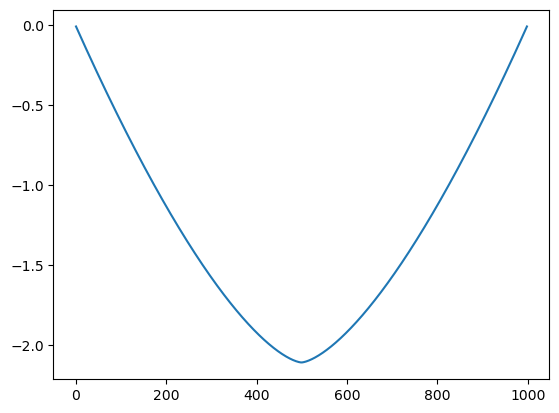

In [6]:
import matplotlib.pyplot as plt
plt.plot(res['x'])
plt.show()

In [7]:
numba_energy_laplace = NumbaEnergyLaplace(p, a, b, ne)
f, df, ddf_cls = numba_energy_laplace.recompile()
x0 = numba_energy_laplace.x0


In [8]:
res = newton(f, df, ddf_cls, x0, tolf=1e-6, tolg=1e-3, maxit=1000, verbose=True)
res


it=1, f=-16.21816, fstep = 1.62182e+01, ||g||=0.63214, nitf=26, a=1.50872e-01, b=3.62631e-01
it=2, f=-16.50968, fstep = 2.91523e-01, ||g||=12.20502, nitf=20, a=-1.57513e-04, b=3.81966e-01
it=3, f=-16.78037, fstep = 2.70689e-01, ||g||=29.91427, nitf=22, a=-1.41604e-04, b=1.48048e-01
it=4, f=-16.84101, fstep = 6.06385e-02, ||g||=30.68271, nitf=22, a=-7.55906e-05, b=1.12981e-01
it=5, f=-16.85229, fstep = 1.12764e-02, ||g||=12.94238, nitf=24, a=-1.23603e-04, b=6.87212e-02
it=6, f=-16.85811, fstep = 5.82761e-03, ||g||=8.40371, nitf=23, a=-9.44528e-05, b=1.07374e-01
it=7, f=-16.86079, fstep = 2.67146e-03, ||g||=5.82907, nitf=23, a=-8.80484e-05, b=1.21215e-01
it=8, f=-16.86232, fstep = 1.53823e-03, ||g||=4.46735, nitf=23, a=-8.59608e-05, b=1.26533e-01
it=9, f=-16.86330, fstep = 9.76275e-04, ||g||=3.57358, nitf=22, a=-8.53000e-05, b=1.28076e-01
it=10, f=-16.86395, fstep = 6.46490e-04, ||g||=2.90567, nitf=22, a=-8.44734e-05, b=1.29699e-01
it=11, f=-16.86438, fstep = 4.35776e-04, ||g||=2.38376, 

 message: Stopping condition for f is satisfied
     fun: -16.8654645806473
       x: [-6.322e-03 -1.263e-02 ... -1.263e-02 -6.322e-03]
     nit: 36

In [9]:
numpy_energy_laplace = NumpyEnergyLaplace(p, a, b, ne)
f, df, ddf_cls = numpy_energy_laplace.recompile()
x0 = numpy_energy_laplace.x0


In [12]:
%%timeit
res = newton(f, df, ddf_cls, x0, tolf=1e-6, tolg=1e-3, maxit=1000, verbose=False)



98.3 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
jax_energy = JaxEnergy(p, a, b, ne)
f, df, ddf_cls = jax_energy.recompile()
x0 = jax_energy.x0

In [39]:

x1 = 5 * jax_energy.x**2 - 5
x1 = x1[1:-1]
res = trust_region2(f, df, ddf_cls_jax_sparse, x1, c0=1, tolf=1e-6, tolg=1e-3, maxit=1000, verbose=True)
res


it=1, f=4.38684495322192, fstep = 7.22991e+01, ||g||=640.51556, nitf=99, a=-1.91584e-06, b=1.68524e+00, c=1.00000e+00
it=2, f=1.8672601818460155, fstep = 2.51958e+00, ||g||=465.27623, nitf=74, a=-2.52529e-07, b=1.57659e-01, c=1.00000e-01
it=3, f=1.5879843922055707, fstep = 2.79276e-01, ||g||=225.25613, nitf=128, a=-4.44034e-07, b=1.31879e-02, c=1.00000e-02
it=4, f=1.510221148031454, fstep = 7.77632e-02, ||g||=236.33402, nitf=99, a=-2.52436e-07, b=1.00594e-03, c=1.00000e-03
it=5, f=1.4686864652961313, fstep = 4.15347e-02, ||g||=163.76475, nitf=105, a=-4.19933e-07, b=7.83461e-05, c=1.00000e-04
it=6, f=1.4429151005214051, fstep = 2.57714e-02, ||g||=203.44418, nitf=115, a=-2.45623e-07, b=5.98962e-06, c=1.00000e-05
it=7, f=1.4262296950155617, fstep = 1.66854e-02, ||g||=152.02184, nitf=121, a=-4.07252e-07, b=4.51609e-07, c=1.00000e-06
it=8, f=1.417472450772031, fstep = 8.75724e-03, ||g||=192.74222, nitf=126, a=-2.43057e-07, b=1.97241e-07, c=1.00000e-06
it=9, f=1.4106073716603784, fstep = 6.8

 message: Stopping condition for f is satisfied
     fun: -10.735996816463897
       x: [-2.423e-03 -4.845e-03 ... -4.845e-03 -2.423e-03]
     nit: 41

In [37]:

x1 = jax_energy.x**2 - 1
x1 = x1[1:-1]
res = newton(f, df, ddf_cls_jax_sparse, x1, tolf=1e-6, tolg=1e-3, maxit=100, verbose=True)


it=1, f=76.39658, fstep = 2.89346e-01, ||g||=640.51556, nitf=71, a=-9.21784e-07, b=0.00000e+00
it=2, f=76.34555, fstep = 5.10263e-02, ||g||=1397.48273, nitf=75, a=-4.91544e-08, b=0.00000e+00
it=3, f=76.32145, fstep = 2.41021e-02, ||g||=889.25661, nitf=74, a=-5.80414e-08, b=0.00000e+00
it=4, f=76.30269, fstep = 1.87591e-02, ||g||=895.57065, nitf=74, a=-4.33396e-08, b=0.00000e+00
it=5, f=76.28454, fstep = 1.81546e-02, ||g||=748.34935, nitf=74, a=-6.39147e-08, b=0.00000e+00
it=6, f=76.26745, fstep = 1.70852e-02, ||g||=927.43420, nitf=74, a=-3.72020e-08, b=0.00000e+00
it=7, f=76.24892, fstep = 1.85331e-02, ||g||=687.79853, nitf=73, a=-7.99867e-08, b=0.00000e+00
it=8, f=76.23027, fstep = 1.86469e-02, ||g||=1046.47207, nitf=74, a=-3.39710e-08, b=0.00000e+00
it=9, f=76.21198, fstep = 1.82903e-02, ||g||=672.20573, nitf=73, a=-7.58661e-08, b=0.00000e+00
it=10, f=76.19515, fstep = 1.68341e-02, ||g||=969.35422, nitf=74, a=-3.35505e-08, b=0.00000e+00
it=11, f=76.17492, fstep = 2.02305e-02, ||g||=6

In [40]:
jax_energy = JaxEnergySparse(p, a, b, ne)
f, df, ddf_cls_jax_sparse = jax_energy.recompile()
x0 = jax_energy.x0


In [43]:
%%timeit
x1 = 5 * jax_energy.x**2 - 5
x1 = x1[1:-1]
res = newton(f, df, ddf_cls_jax_sparse, x1, tolf=1e-6, tolg=1e-3, maxit=100, verbose=False)


109 ms ± 9.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
res = trust_region2(f, df, ddf_cls_jax_sparse, x0, c0=1.0, tolf=1e-6, tolg=1e-3, maxit=1000, verbose=True)
res


it=1, f=-0.08419886231422424, fstep = 8.41989e-02, ||g||=0.63214, nitf=33, a=-2.50188e-01, b=6.55744e-02, c=1.00000e+00
it=2, f=-0.17126211524009705, fstep = 8.70633e-02, ||g||=14.08727, nitf=123, a=1.05894e-03, b=3.32781e+00, c=1.00000e+01
it=3, f=-0.31094804406166077, fstep = 1.39686e-01, ||g||=14.41900, nitf=97, a=-2.45805e-04, b=3.44506e-01, c=1.00000e+00
it=4, f=-0.4859064221382141, fstep = 1.74958e-01, ||g||=21.37976, nitf=91, a=-1.50866e-04, b=5.29438e-02, c=1.00000e-01
it=5, f=-0.7725743055343628, fstep = 2.86668e-01, ||g||=24.82234, nitf=115, a=-1.40119e-04, b=9.38708e-03, c=1.00000e-02
it=6, f=-1.0087981224060059, fstep = 2.36224e-01, ||g||=36.65190, nitf=89, a=-1.52179e-04, b=5.60887e-04, c=1.00000e-03
it=7, f=-1.1710920333862305, fstep = 1.62294e-01, ||g||=29.28739, nitf=88, a=-1.75236e-04, b=3.91435e-05, c=1.00000e-04
it=8, f=-1.6981968879699707, fstep = 5.27105e-01, ||g||=23.13265, nitf=128, a=-1.78546e-04, b=2.02219e-03, c=1.00000e-03
it=9, f=-2.054184913635254, fstep = 

 message: Stopping condition for f is satisfied
     fun: -16.86547
       x: [-6.321e-03 -1.264e-02 ... -1.264e-02 -6.321e-03]
     nit: 23

In [ ]:
jax_energy = JaxEnergySFD(p, a, b, ne)
f, df, ddf_cls = jax_energy.recompile()
x0 = jax_energy.x0


In [ ]:
res = newton(f, df, ddf_cls, x0, tolf=1e-6, tolg=1e-3, maxit=100, verbose=True)


it=1, f=-16.12386, fstep = 1.61239e+01, ||g||=0.63214, nitf=165, a=-1.25602e-01, b=1.28674e-05
it=2, f=-16.13397, fstep = 1.01128e-02, ||g||=14.53568, nitf=83, a=-2.06668e-04, b=1.02975e-03
it=3, f=-16.58898, fstep = 4.55006e-01, ||g||=15.52044, nitf=76, a=-6.19746e-05, b=3.12856e-01
it=4, f=-16.81388, fstep = 2.24905e-01, ||g||=4.71070, nitf=46, a=-1.17916e-04, b=7.99937e-01
it=5, f=-16.86332, fstep = 4.94404e-02, ||g||=13.47993, nitf=65, a=-6.30121e-05, b=1.11781e+00
it=6, f=-16.86539, fstep = 2.06947e-03, ||g||=1.67377, nitf=69, a=9.16517e-06, b=1.11303e+00
it=7, f=-16.86547, fstep = 7.62939e-05, ||g||=0.27303, nitf=62, a=-3.68627e-05, b=8.65485e-01
it=8, f=-16.86547, fstep = 1.90735e-06, ||g||=0.06329, nitf=80, a=-9.27147e-05, b=1.84692e-01
it=9, f=-16.86547, fstep = 0.00000e+00, ||g||=0.01999, nitf=126, a=-2.65623e-04, b=8.01613e-01


In [ ]:
%%timeit
res = newton(f, df, ddf_cls, x0, tolf=1e-6, tolg=1e-3, maxit=100, verbose=False)


250 ms ± 21.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
numpy_energy = NumpyEnergySFD(p, a, b, ne)
f, df, ddf_cls = numpy_energy.recompile()
x0 = jax_energy.x0


In [ ]:
res = newton(f, df, ddf_cls, x0, tolf=1e-6, tolg=1e-3, maxit=100, verbose=True)


it=1, f=-15.98681, fstep = 1.59868e+01, ||g||=0.63214, nitf=112, a=6.55012e-01, b=1.88020e-05
it=2, f=-16.09627, fstep = 1.09457e-01, ||g||=30.94751, nitf=92, a=-4.63167e-04, b=1.85678e-02
it=3, f=-16.76397, fstep = 6.67700e-01, ||g||=26.04631, nitf=102, a=-6.37596e-05, b=5.87792e-01
it=4, f=-16.85984, fstep = 9.58734e-02, ||g||=9.29775, nitf=77, a=-8.06254e-05, b=9.90301e-01
it=5, f=-16.86244, fstep = 2.59975e-03, ||g||=9.12185, nitf=94, a=1.57510e-04, b=2.72941e+00
it=6, f=-16.86521, fstep = 2.76596e-03, ||g||=3.11478, nitf=86, a=-2.47942e-05, b=7.92572e-01
it=7, f=-16.86537, fstep = 1.57139e-04, ||g||=0.65225, nitf=57, a=-2.39848e-04, b=3.92481e-01
it=8, f=-16.86547, fstep = 1.00462e-04, ||g||=0.50612, nitf=56, a=-5.69675e-06, b=1.18315e+00
it=9, f=-16.86547, fstep = 3.06243e-06, ||g||=0.11940, nitf=73, a=1.92276e-06, b=1.02250e+00
it=10, f=-16.86547, fstep = 2.33994e-08, ||g||=0.00566, nitf=148, a=-5.74338e-05, b=8.60955e-01


In [ ]:
%%timeit
res = newton(f, df, ddf_cls, x0, tolf=1e-6, tolg=1e-3, maxit=100, verbose=False)


246 ms ± 39.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
numba_energy = NumbaEnergySFD(p, a, b, ne)
f, df, ddf_cls = numba_energy.recompile()
x0 = numba_energy.x0


In [ ]:
res = newton(f, df, ddf_cls, x0, tolf=1e-6, tolg=1e-3, maxit=100, verbose=True)


it=1, f=-16.03290, fstep = 1.60329e+01, ||g||=0.63214, nitf=129, a=-3.59044e-02, b=1.66108e-05
it=2, f=-16.03791, fstep = 5.00479e-03, ||g||=3.60923, nitf=50, a=-8.99264e-04, b=1.14740e-02
it=3, f=-16.77349, fstep = 7.35583e-01, ||g||=24.65056, nitf=68, a=-5.63226e-05, b=5.11547e-01
it=4, f=-16.86354, fstep = 9.00430e-02, ||g||=4.70927, nitf=69, a=-1.98543e-05, b=1.07381e+00
it=5, f=-16.86542, fstep = 1.88181e-03, ||g||=0.91285, nitf=47, a=-2.36106e-05, b=9.39827e-01
it=6, f=-16.86547, fstep = 5.04157e-05, ||g||=0.20387, nitf=39, a=-9.73239e-05, b=9.97534e-01
it=7, f=-16.86547, fstep = 2.64654e-06, ||g||=0.15900, nitf=44, a=-2.46811e-05, b=8.68131e-01
it=8, f=-16.86547, fstep = 9.67317e-08, ||g||=0.02527, nitf=58, a=-2.28679e-05, b=9.50160e-01


In [ ]:
%%timeit
res = newton(f, df, ddf_cls, x0, tolf=1e-6, tolg=1e-3, maxit=100, verbose=False)

35.2 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
res = trust_region2(f, df, ddf_cls, x0, c0=1.0, tolf=1e-6, tolg=1e-3, maxit=1000, verbose=True)
res


it=1, f=-0.04467685893177986, fstep = 4.46769e-02, ||g||=0.63214, nitf=47, a=-9.21643e-02, b=2.83866e-02, c=1.00000e+00
it=2, f=-0.08926926553249359, fstep = 4.45924e-02, ||g||=13.31325, nitf=189, a=2.72106e-05, b=1.21542e+00, c=1.00000e+01
it=3, f=-0.13373664021492004, fstep = 4.44674e-02, ||g||=13.80984, nitf=147, a=2.94587e-06, b=1.19968e-01, c=1.00000e+00
it=4, f=-0.17812666296958923, fstep = 4.43900e-02, ||g||=13.91261, nitf=159, a=2.91929e-07, b=1.20859e-02, c=1.00000e-01
it=5, f=-0.22241997718811035, fstep = 4.42933e-02, ||g||=14.10704, nitf=175, a=-2.26343e-07, b=1.20893e-03, c=1.00000e-02
it=6, f=-0.2666170597076416, fstep = 4.41971e-02, ||g||=14.08844, nitf=176, a=-3.08435e-07, b=1.20868e-04, c=1.00000e-03
it=7, f=-0.3107258081436157, fstep = 4.41087e-02, ||g||=14.04693, nitf=185, a=-2.36156e-07, b=1.20979e-05, c=1.00000e-04
it=8, f=-0.35473817586898804, fstep = 4.40124e-02, ||g||=14.11009, nitf=186, a=-3.45625e-07, b=1.20904e-06, c=1.00000e-05
it=9, f=-0.39864885807037354, f

 message: Stopping condition for f is satisfied
     fun: -10.735983
       x: [-2.422e-03 -4.844e-03 ... -4.844e-03 -2.422e-03]
     nit: 508

In [ ]:
from scipy.optimize._minimize import minimize


def hessp(x):
    H = ddf_cls.ddf(x)  # H is a sparse matrix
    return H.todense()  # Return the product of H and p
resopt = minimize(f, x0, jac=df,hess=hessp, method='dogleg', tol=1e-6, options={'maxiter': 1000})
resopt


 message: A linalg error occurred, such as a non-psd Hessian.
 success: False
  status: 3
     fun: 0.0
       x: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
     nit: 0
     jac: [ 2.000e-02  2.000e-02 ...  2.000e-02  2.000e-02]
    nfev: 1
    njev: 1
    nhev: 1
    hess: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]

In [ ]:
jax_energy = NumpyEnergySFD(p, a, b, ne)
f, df, ddf_cls = jax_energy.recompile()
x0 = jax_energy.x0


In [ ]:
res = trust_region2(f, df, ddf_cls, x0, c0=1, tolf=1e-6, tolg=1e-3, maxit=1000, verbose=True)
res


1e-07
it=1, f=-0.0849023312330246, fstep = 8.49023e-02, ||g||=0.63214, nitf=32, a=-2.45378e-01, b=7.84046e-02, c=1.00000e+00
1e-07
it=2, f=-0.16732820868492126, fstep = 8.24259e-02, ||g||=14.64026, nitf=111, a=8.97294e-05, b=1.62886e+00, c=1.00000e+01
1e-07
it=3, f=-0.3195071220397949, fstep = 1.52179e-01, ||g||=12.31423, nitf=107, a=-1.56230e-04, b=5.01981e-01, c=1.00000e+00
1e-07
it=4, f=-0.5072640180587769, fstep = 1.87757e-01, ||g||=16.86958, nitf=65, a=-2.80926e-04, b=5.53518e-02, c=1.00000e-01
1e-07
it=5, f=-0.7521848678588867, fstep = 2.44921e-01, ||g||=25.79710, nitf=80, a=-1.63066e-04, b=7.53826e-03, c=1.00000e-02
1e-07
it=6, f=-2.095961093902588, fstep = 1.34378e+00, ||g||=29.57132, nitf=79, a=-1.50931e-04, b=5.17732e-03, c=1.00000e-03
2.631974649247365e-07
it=7, f=-2.668853759765625, fstep = 5.72893e-01, ||g||=19.60071, nitf=80, a=-5.11539e-04, b=2.29900e-04, c=1.00000e-04
3.3290327977546804e-07
it=8, f=-2.7383341789245605, fstep = 6.94804e-02, ||g||=22.61851, nitf=118, a=-2

 message: Stopping condition for f is satisfied
     fun: -16.86547
       x: [-6.321e-03 -1.264e-02 ... -1.264e-02 -6.321e-03]
     nit: 30

In [ ]:
res = newton(f, df, ddf_cls, x0, tolf=1e-6, tolg=1e-3, maxit=1000, verbose=True)
res

1e-07
it=1, f=-16.17525, fstep = 1.61753e+01, ||g||=0.63214, nitf=130, a=2.04982e-01, b=1.89680e-05
2.52188188268581e-06
it=2, f=-16.22863, fstep = 5.33810e-02, ||g||=15.98564, nitf=86, a=-1.72251e-04, b=2.08351e-02
2.528847823632326e-06
it=3, f=-16.78492, fstep = 5.56292e-01, ||g||=13.48526, nitf=100, a=-8.85497e-05, b=6.44971e-01
2.6458391575559575e-06
it=4, f=-16.86455, fstep = 7.96280e-02, ||g||=4.40014, nitf=87, a=5.34894e-06, b=1.02543e+00
2.5707305902551526e-06
it=5, f=-16.86535, fstep = 7.97272e-04, ||g||=0.43779, nitf=51, a=-3.13577e-04, b=1.23183e+00
2.5862592543688065e-06
it=6, f=-16.86547, fstep = 1.22070e-04, ||g||=0.93616, nitf=73, a=-1.16253e-05, b=8.51709e-01
2.581979107780022e-06
it=7, f=-16.86547, fstep = 0.00000e+00, ||g||=0.01893, nitf=71, a=-9.15044e-04, b=1.10188e+00


 message: Stopping condition for f is satisfied
     fun: -16.86547
       x: [-6.318e-03 -1.264e-02 ... -1.264e-02 -6.318e-03]
     nit: 7

In [ ]:
from scipy.optimize._minimize import minimize
import scipy.sparse as sp  # type: ignore

In [ ]:
sp.linalg.spsolve(hess_callable(x0),x0 + 1)

1e-07


array([  19977.68736914,   39915.37476597,   59813.06221819,
         79670.74975338,   99488.43739912,  119266.12518291,
        139003.8131322 ,  158701.50127436,  178359.18963675,
        197976.87824665,  217554.56713126,  237092.25631778,
        256589.94583331,  276047.6357049 ,  295465.32595957,
        314843.01662425,  334180.70772585,  353478.3992912 ,
        372736.09134707,  391953.7839202 ,  411131.47703725,
        430269.17072484,  449366.86500953,  468424.55991782,
        487442.25547616,  506419.95171094,  525357.6486485 ,
        544255.34631511,  563113.04473701,  581930.74394037,
        600708.44395129,  619446.14479585,  638143.84650004,
        656801.54908981,  675419.25259105,  693996.95702961,
        712534.66243126,  731032.36882173,  749490.07622669,
        767907.78467175,  786285.49418248,  804623.20478438,
        822920.9165029 ,  841178.62936342,  859396.3433913 ,
        877574.05861181,  895711.77505017,  913809.49273157,
        931867.2116811 ,

In [13]:
class MyHessP:
    def __init__(self, ddf):
        self.ddf = ddf
        self.x = None
        self.iters = []
    def __call__(self, x, p):
        if self.x is not x:
            self.iters.append(0)
            self.x = x
            self.H = self.ddf(x)
        self.iters[-1] += 1
        return self.H @ p
myhessp = MyHessP(ddf_cls.ddf)
result = minimize(f, x0, method='Newton-CG', jac=df, hessp=myhessp, tol=1e-6)
print(myhessp.iters)
result


AttributeError: 'HessGeneratorLaplace' object has no attribute 'ddf'

In [ ]:
from scipy.optimize._minimize import minimize
class MyHessP:
    def __init__(self, ddf):
        self.ddf = ddf
        self.x = None
        self.iters = []

    def __call__(self, x, p):
        if self.x is not x:
            self.iters.append(0)
            self.x = x
            self.H = self.ddf(x)
        self.iters[-1] += 1
        return self.H @ p


myhessp = MyHessP(ddf_cls.ddf)
result = minimize(f, x0, method='Newton-CG', jac=df, hessp=myhessp, tol=1e-19)
print(myhessp.iters)
result


[1]


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.0
       x: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
     nit: 1
     jac: [ 2.000e-02  2.000e-02 ...  2.000e-02  2.000e-02]
    nfev: 1
    njev: 1
    nhev: 1